In [57]:
import matplotlib.pyplot as plt
import pandas as pd

#N - ratio of Nitrogen content in soil
#P - ratio of Phosphorous content in soil
#K - ratio of Potassium content in soil
#temperature - temperature in degree Celsius
#humidity - relative humidity in %
#ph - ph value of the soil
#rainfall - rainfall in mm

#Treinar: Árvore de decisão, Random Forest, MLP, KNN (k=3)
#Mostrar a Árvore de decisão
#Comparar resultados
#Usar hiperparâmetros default e mostrá-los (treinar duas MLPs, uma com hiperparâmetros default e outra usando GridSearch)
#Usar validação cruzada

crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [58]:
crop.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [59]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [61]:
rf = RandomForestClassifier()
#=======================================
kn = KNeighborsClassifier(n_neighbors=5)
#=======================================
dt = DecisionTreeClassifier()
#=======================================
mlp = MLPClassifier()
#=======================================
mlpCV = MLPClassifier()

In [62]:
X = crop.drop(['label'], axis=1)
Y = crop['label']

In [63]:
print(Y)

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


In [64]:
#Random Forest
rf_score = cross_val_score(rf, X, Y, cv = 5)
print(rf_score)

[0.99545455 0.99318182 0.99772727 0.99545455 0.98636364]


In [65]:
#KNN
knn_score = cross_val_score(kn, X, Y, cv = 5)
print(knn_score)

[0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [66]:
#Decision Tree
dt_result = cross_validate(dt, X, Y, cv = 5, return_estimator=True)
print(dt_result['test_score'])

[0.98863636 0.98409091 0.98863636 0.98863636 0.98409091]


In [67]:
#MLP
mlp_score = cross_val_score(mlp, X, Y, cv = 5)
print(mlp_score)

[0.95909091 0.97045455 0.97045455 0.95909091 0.96363636]


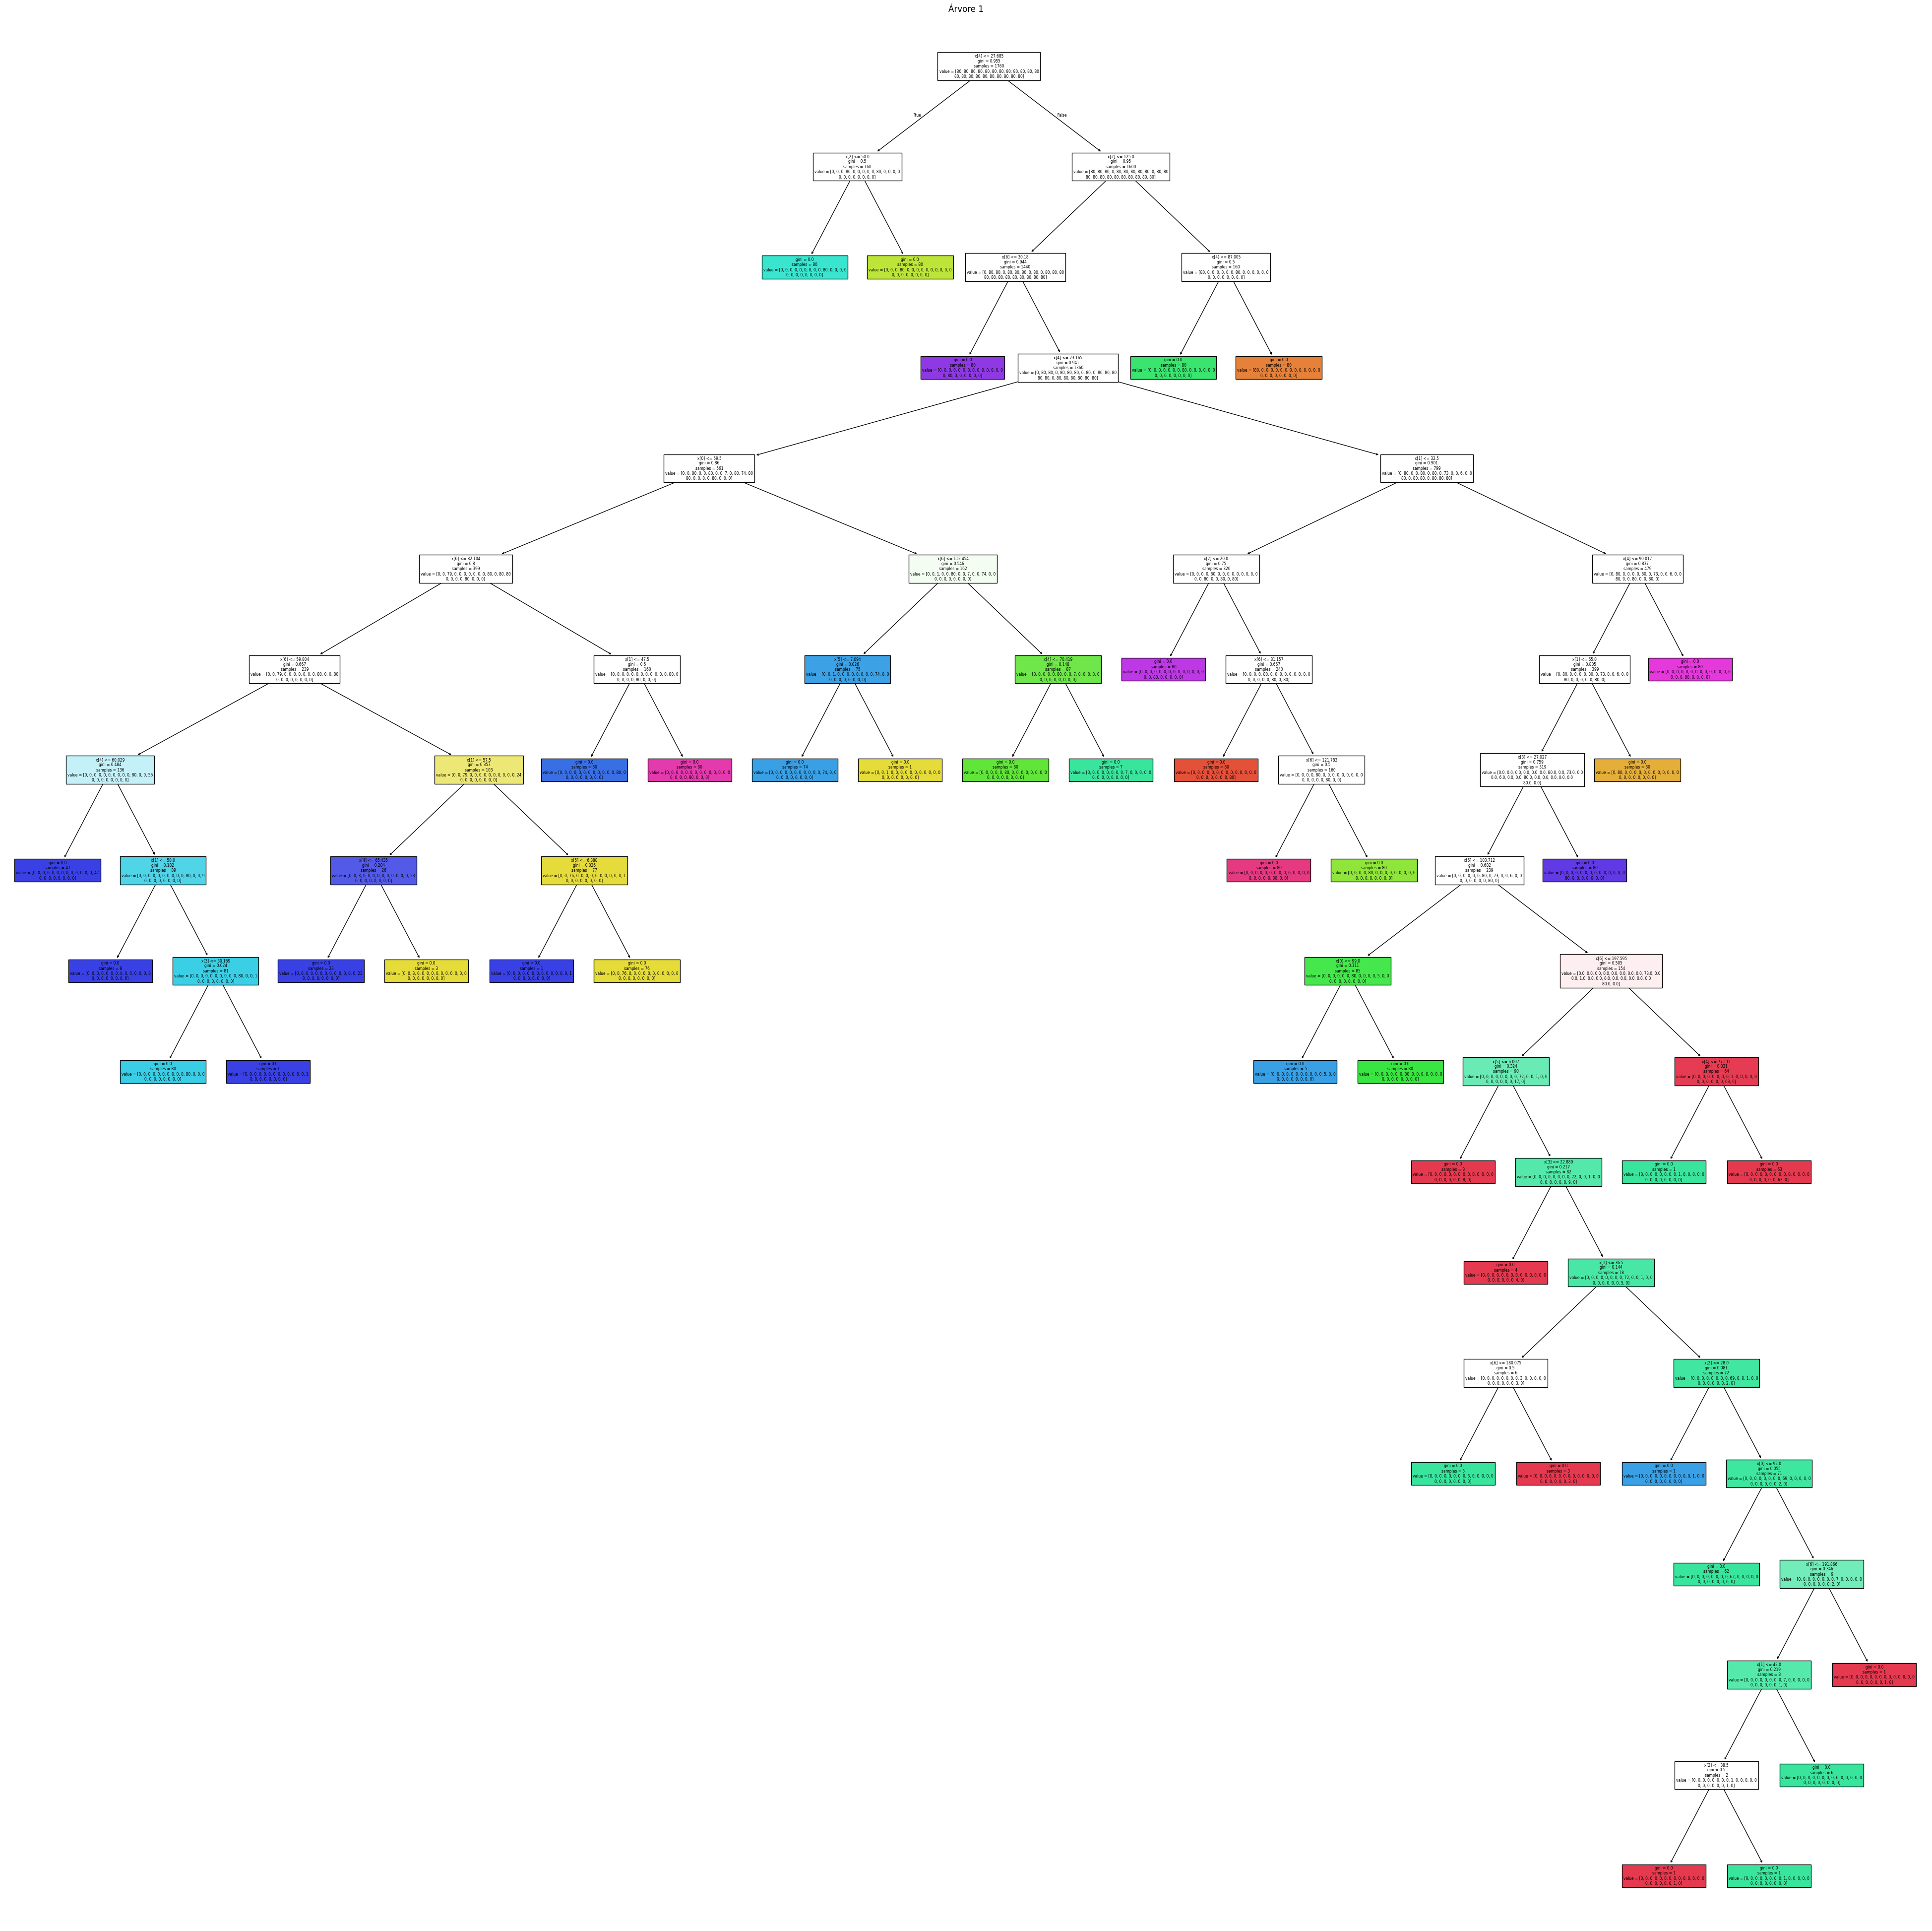

<Figure size 640x480 with 0 Axes>

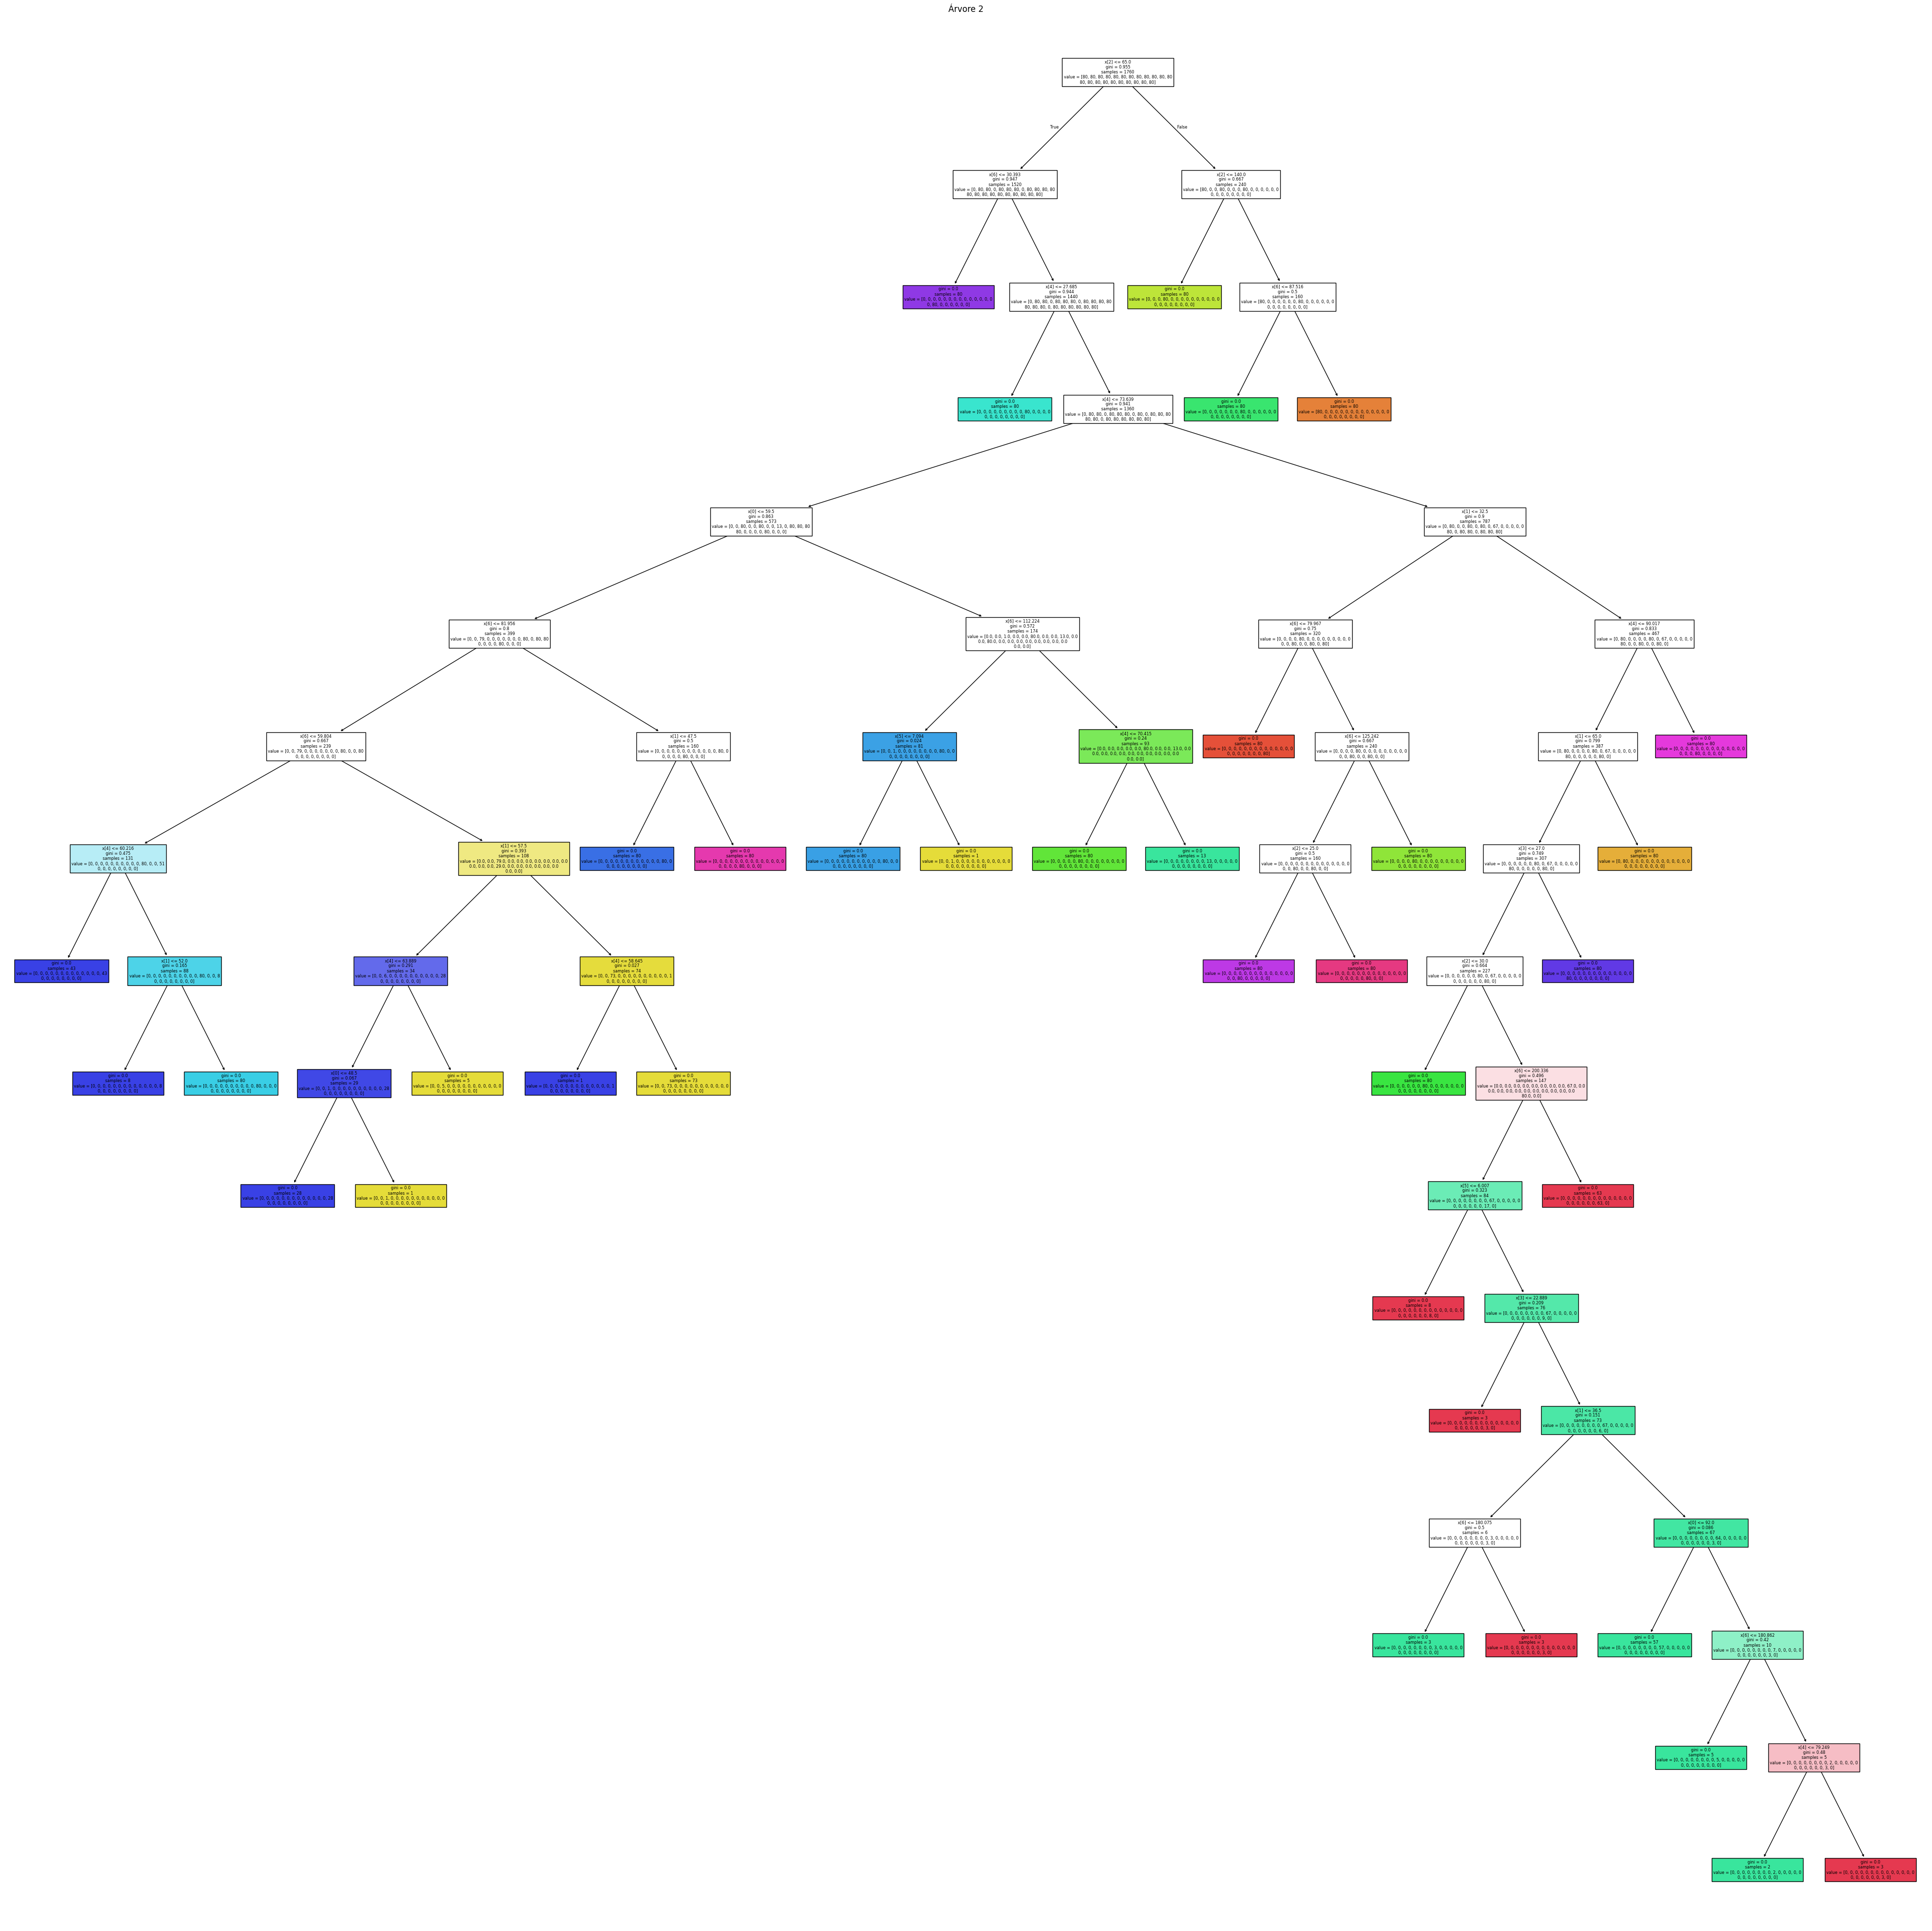

<Figure size 640x480 with 0 Axes>

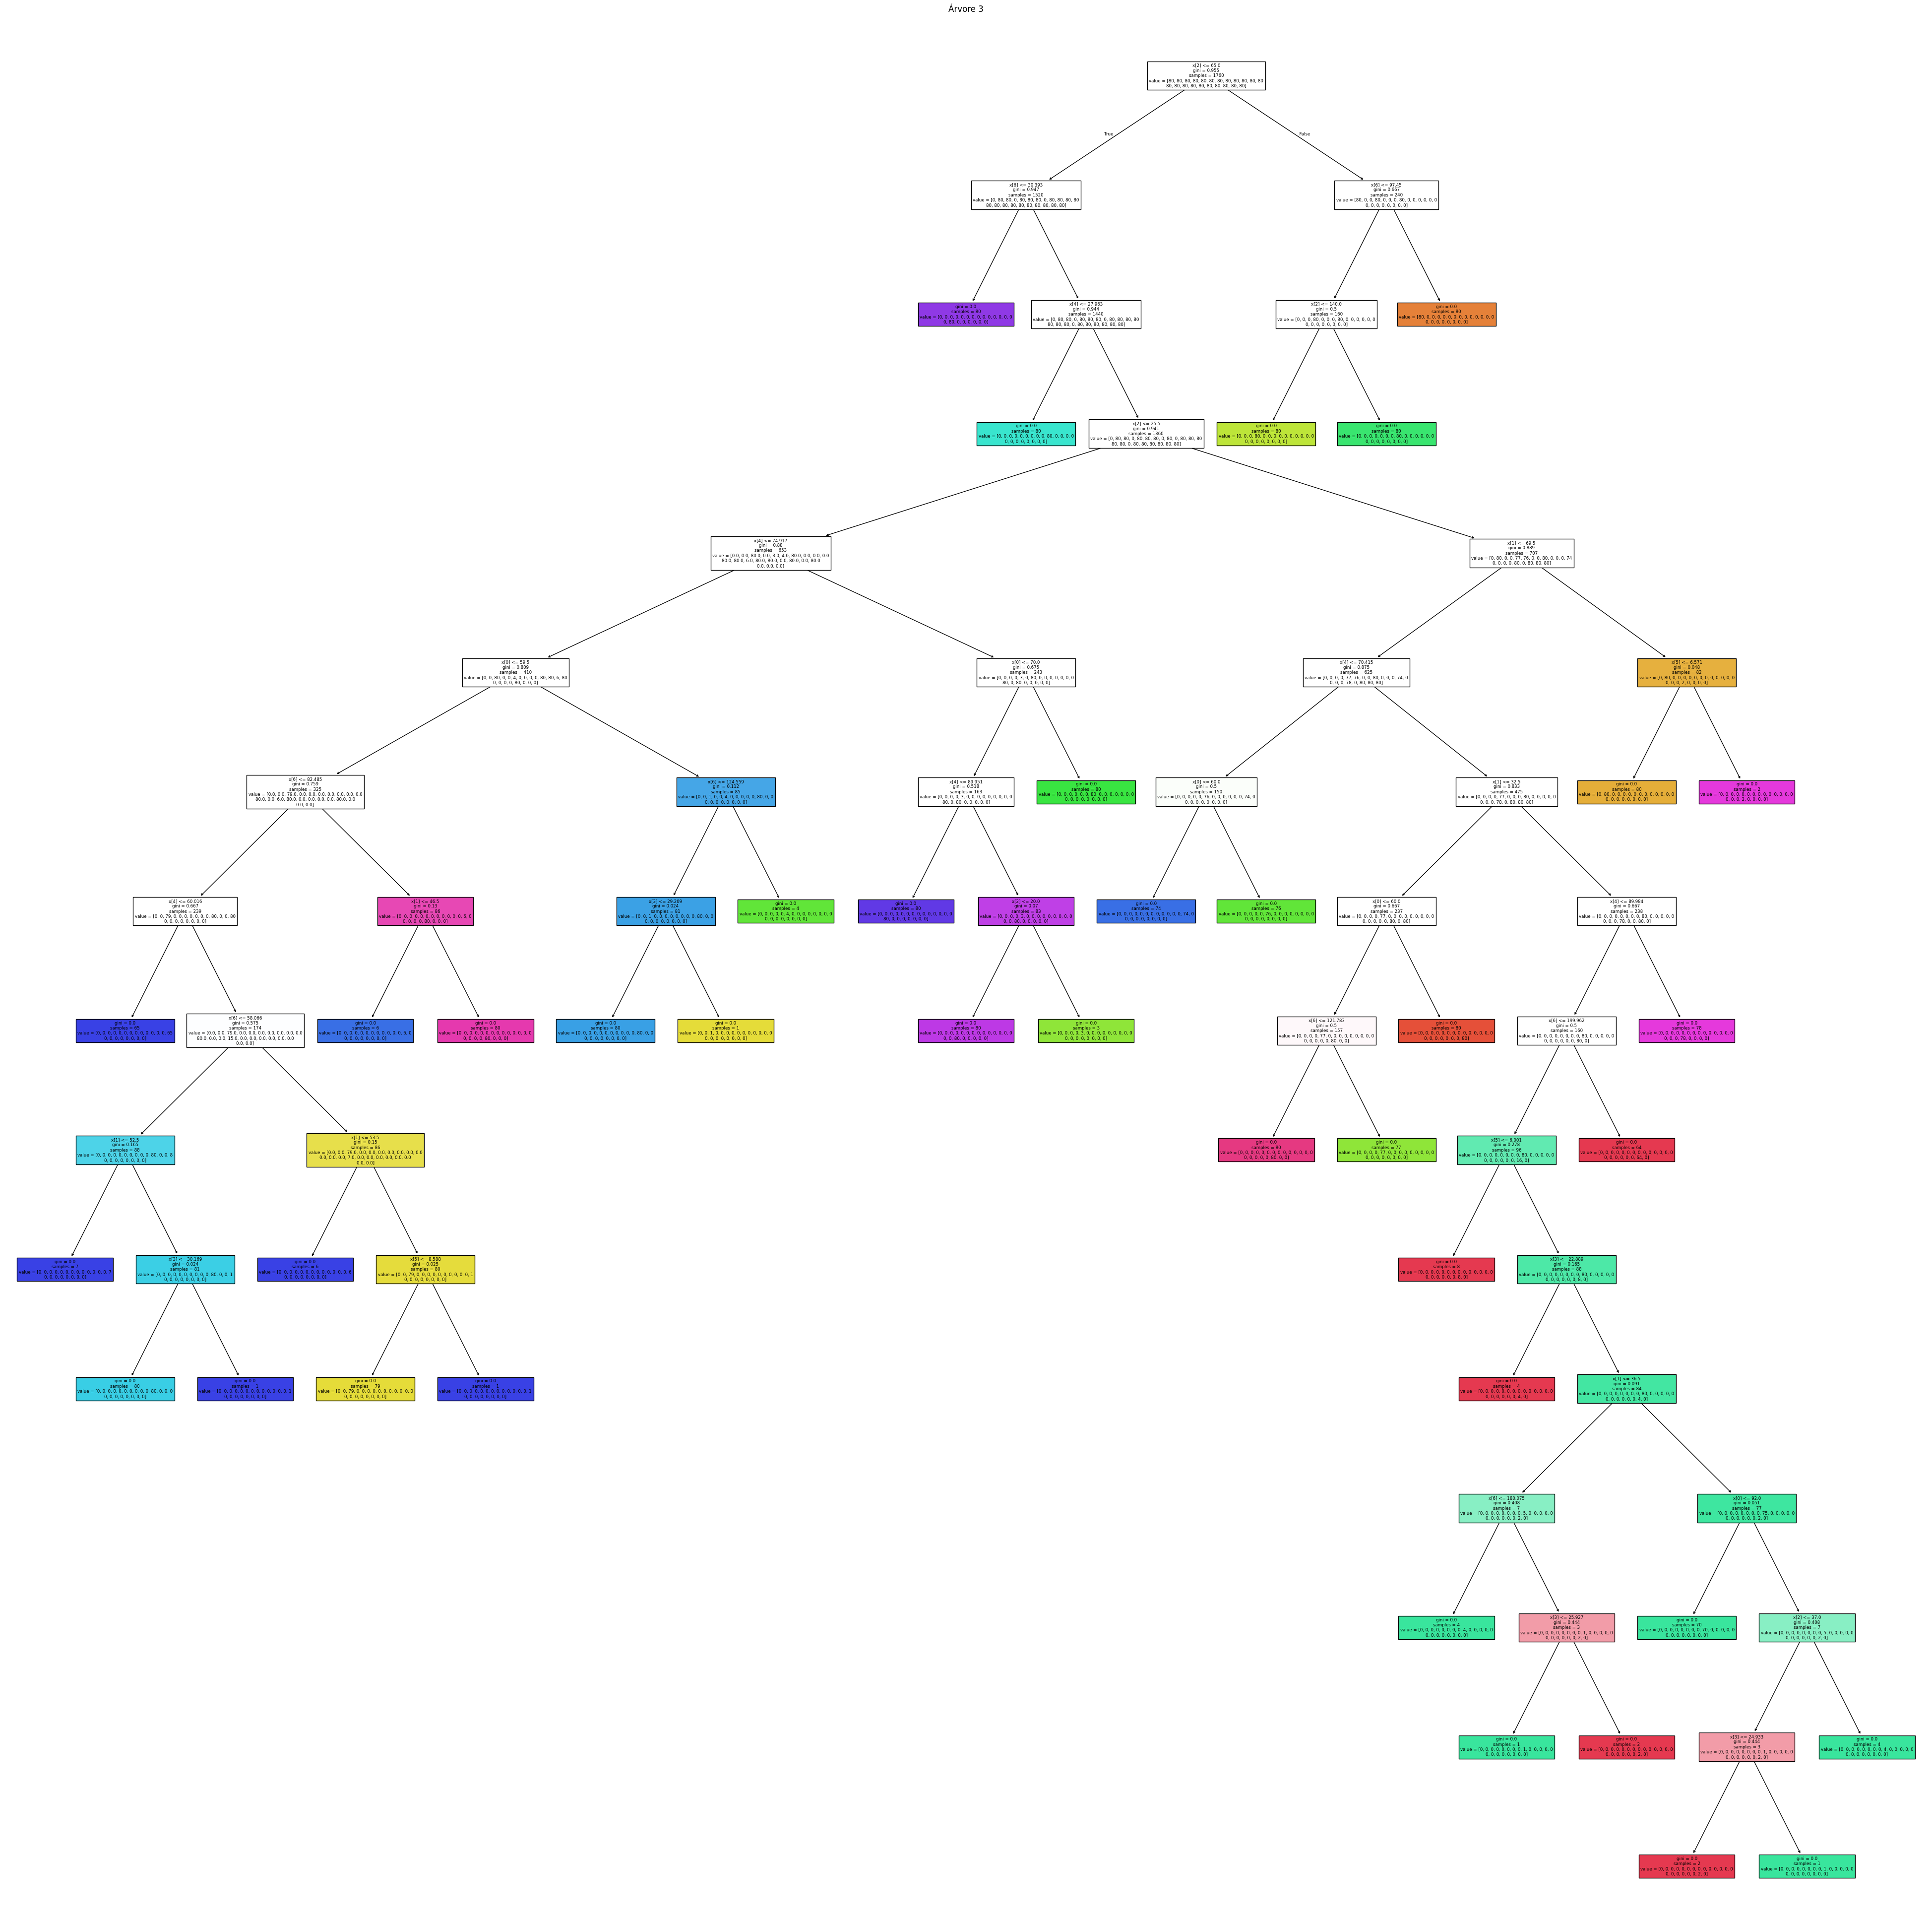

<Figure size 640x480 with 0 Axes>

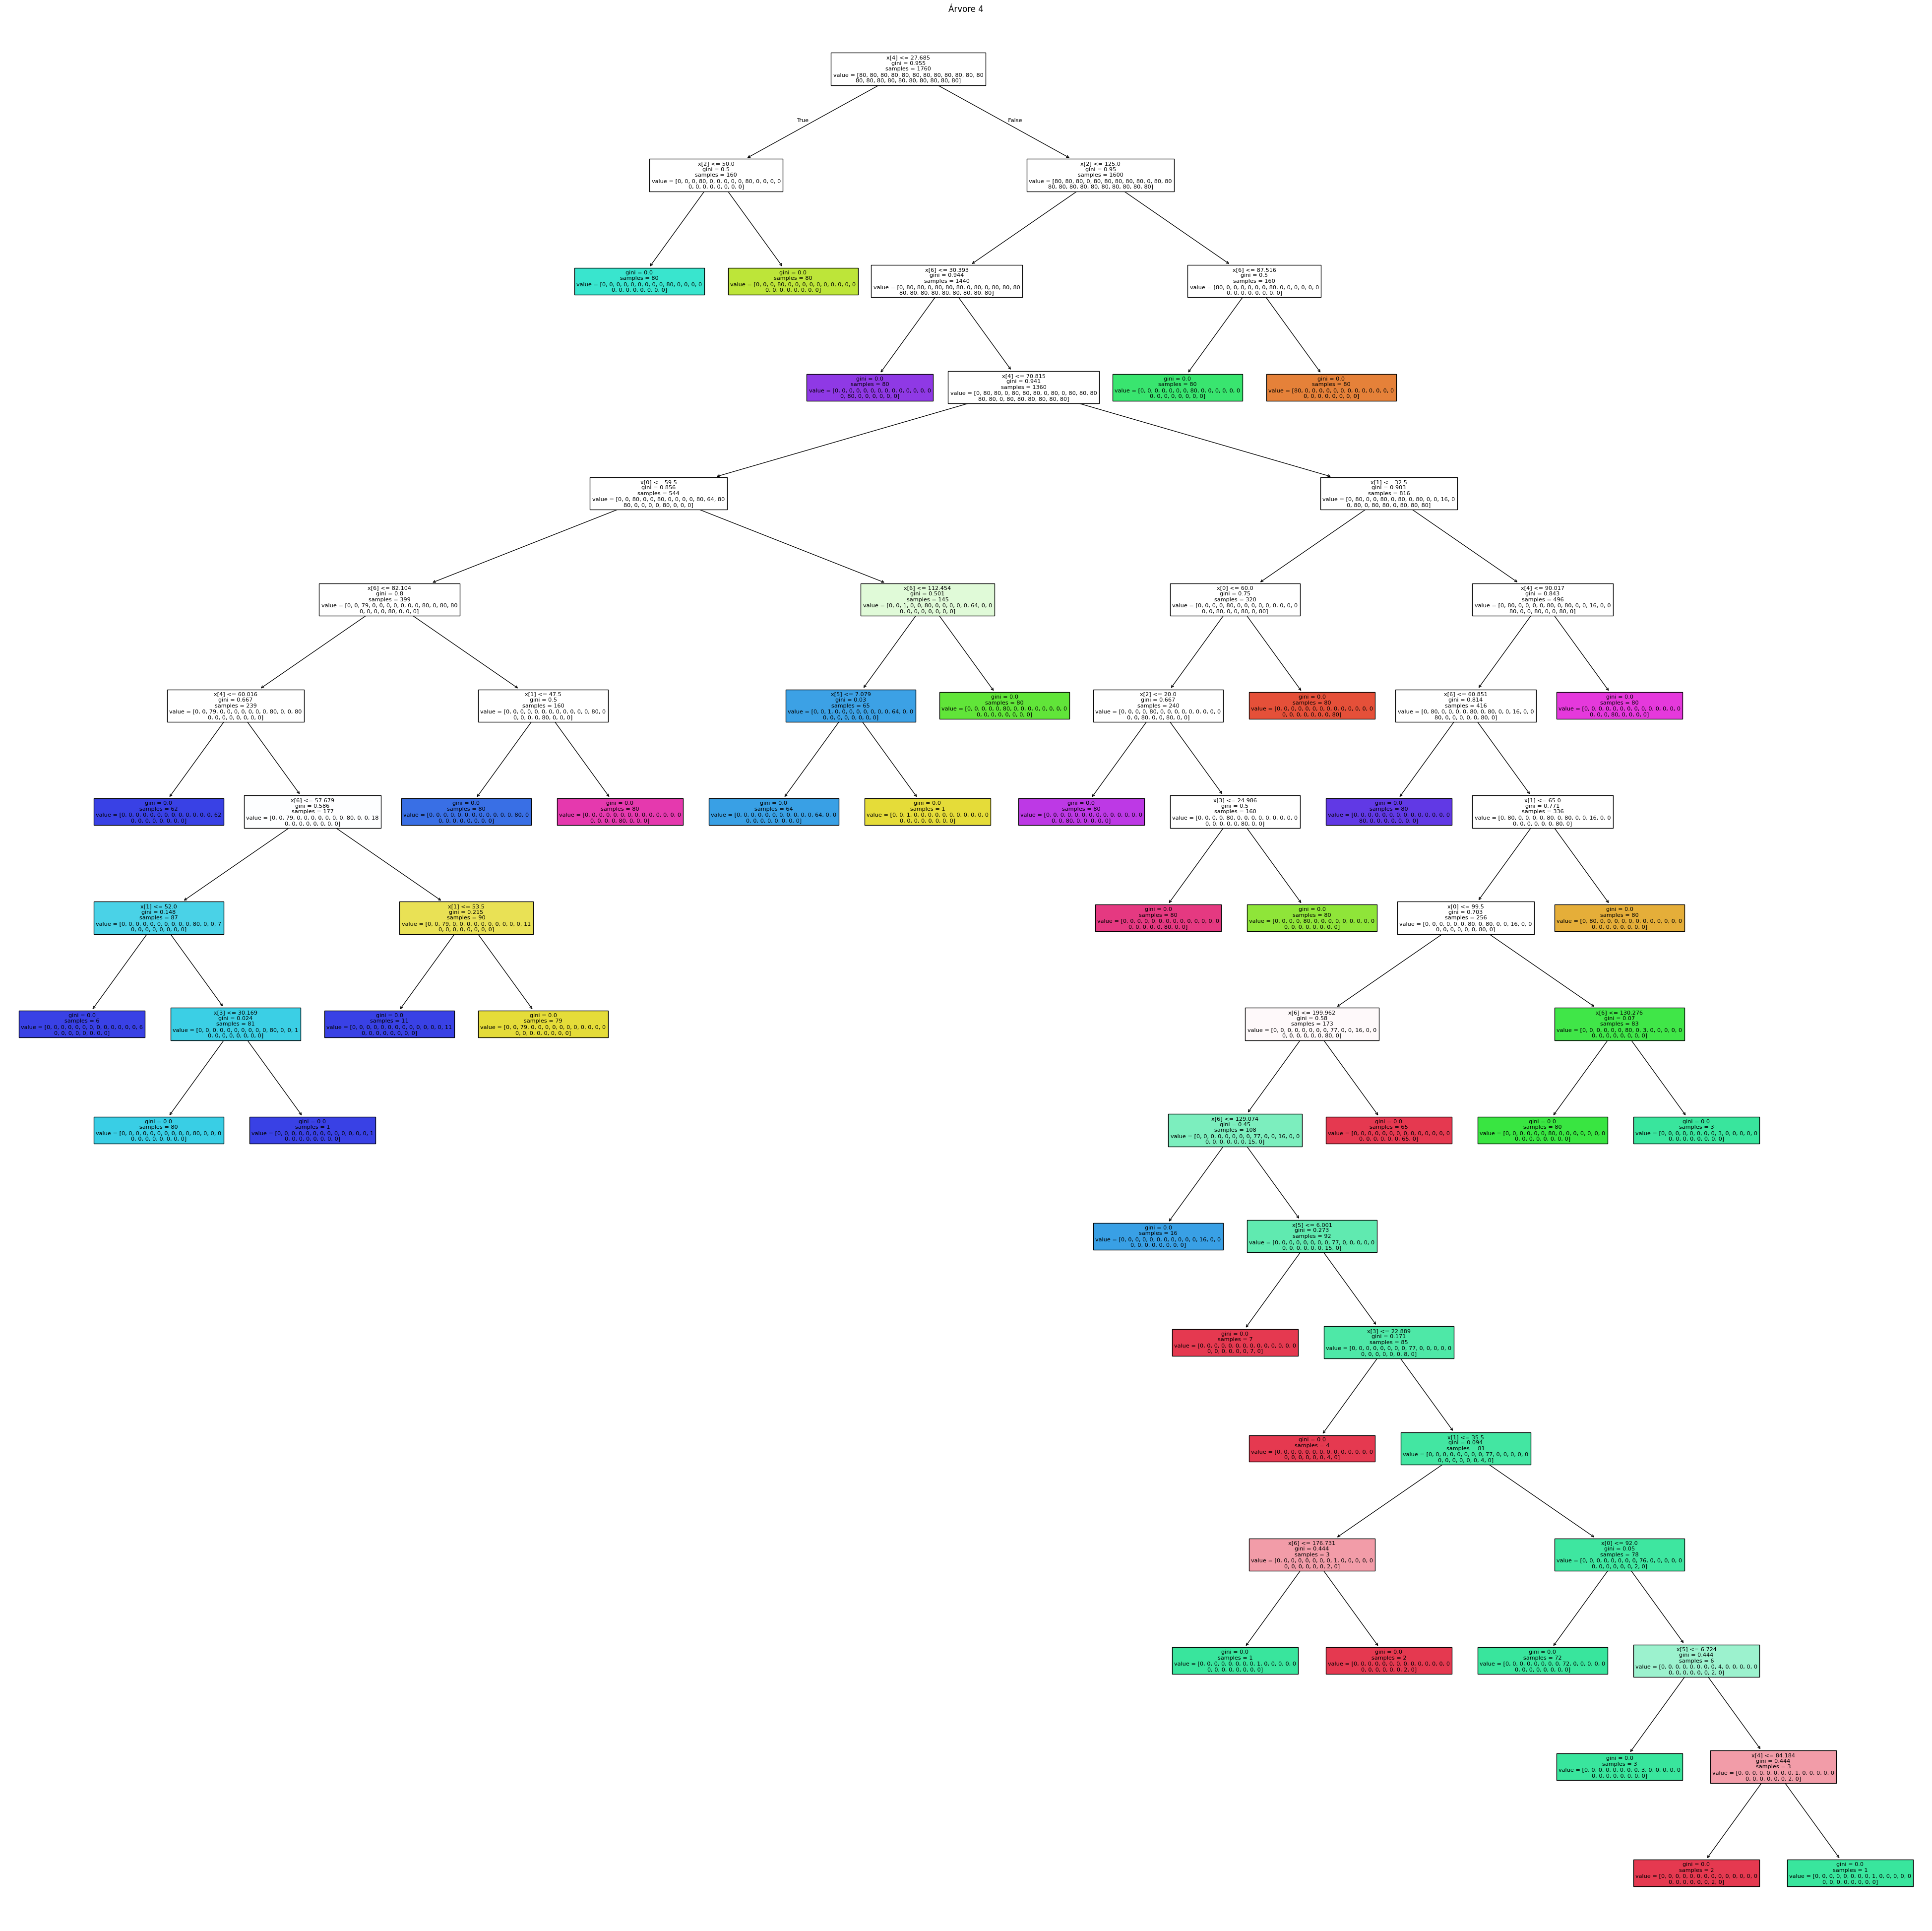

<Figure size 640x480 with 0 Axes>

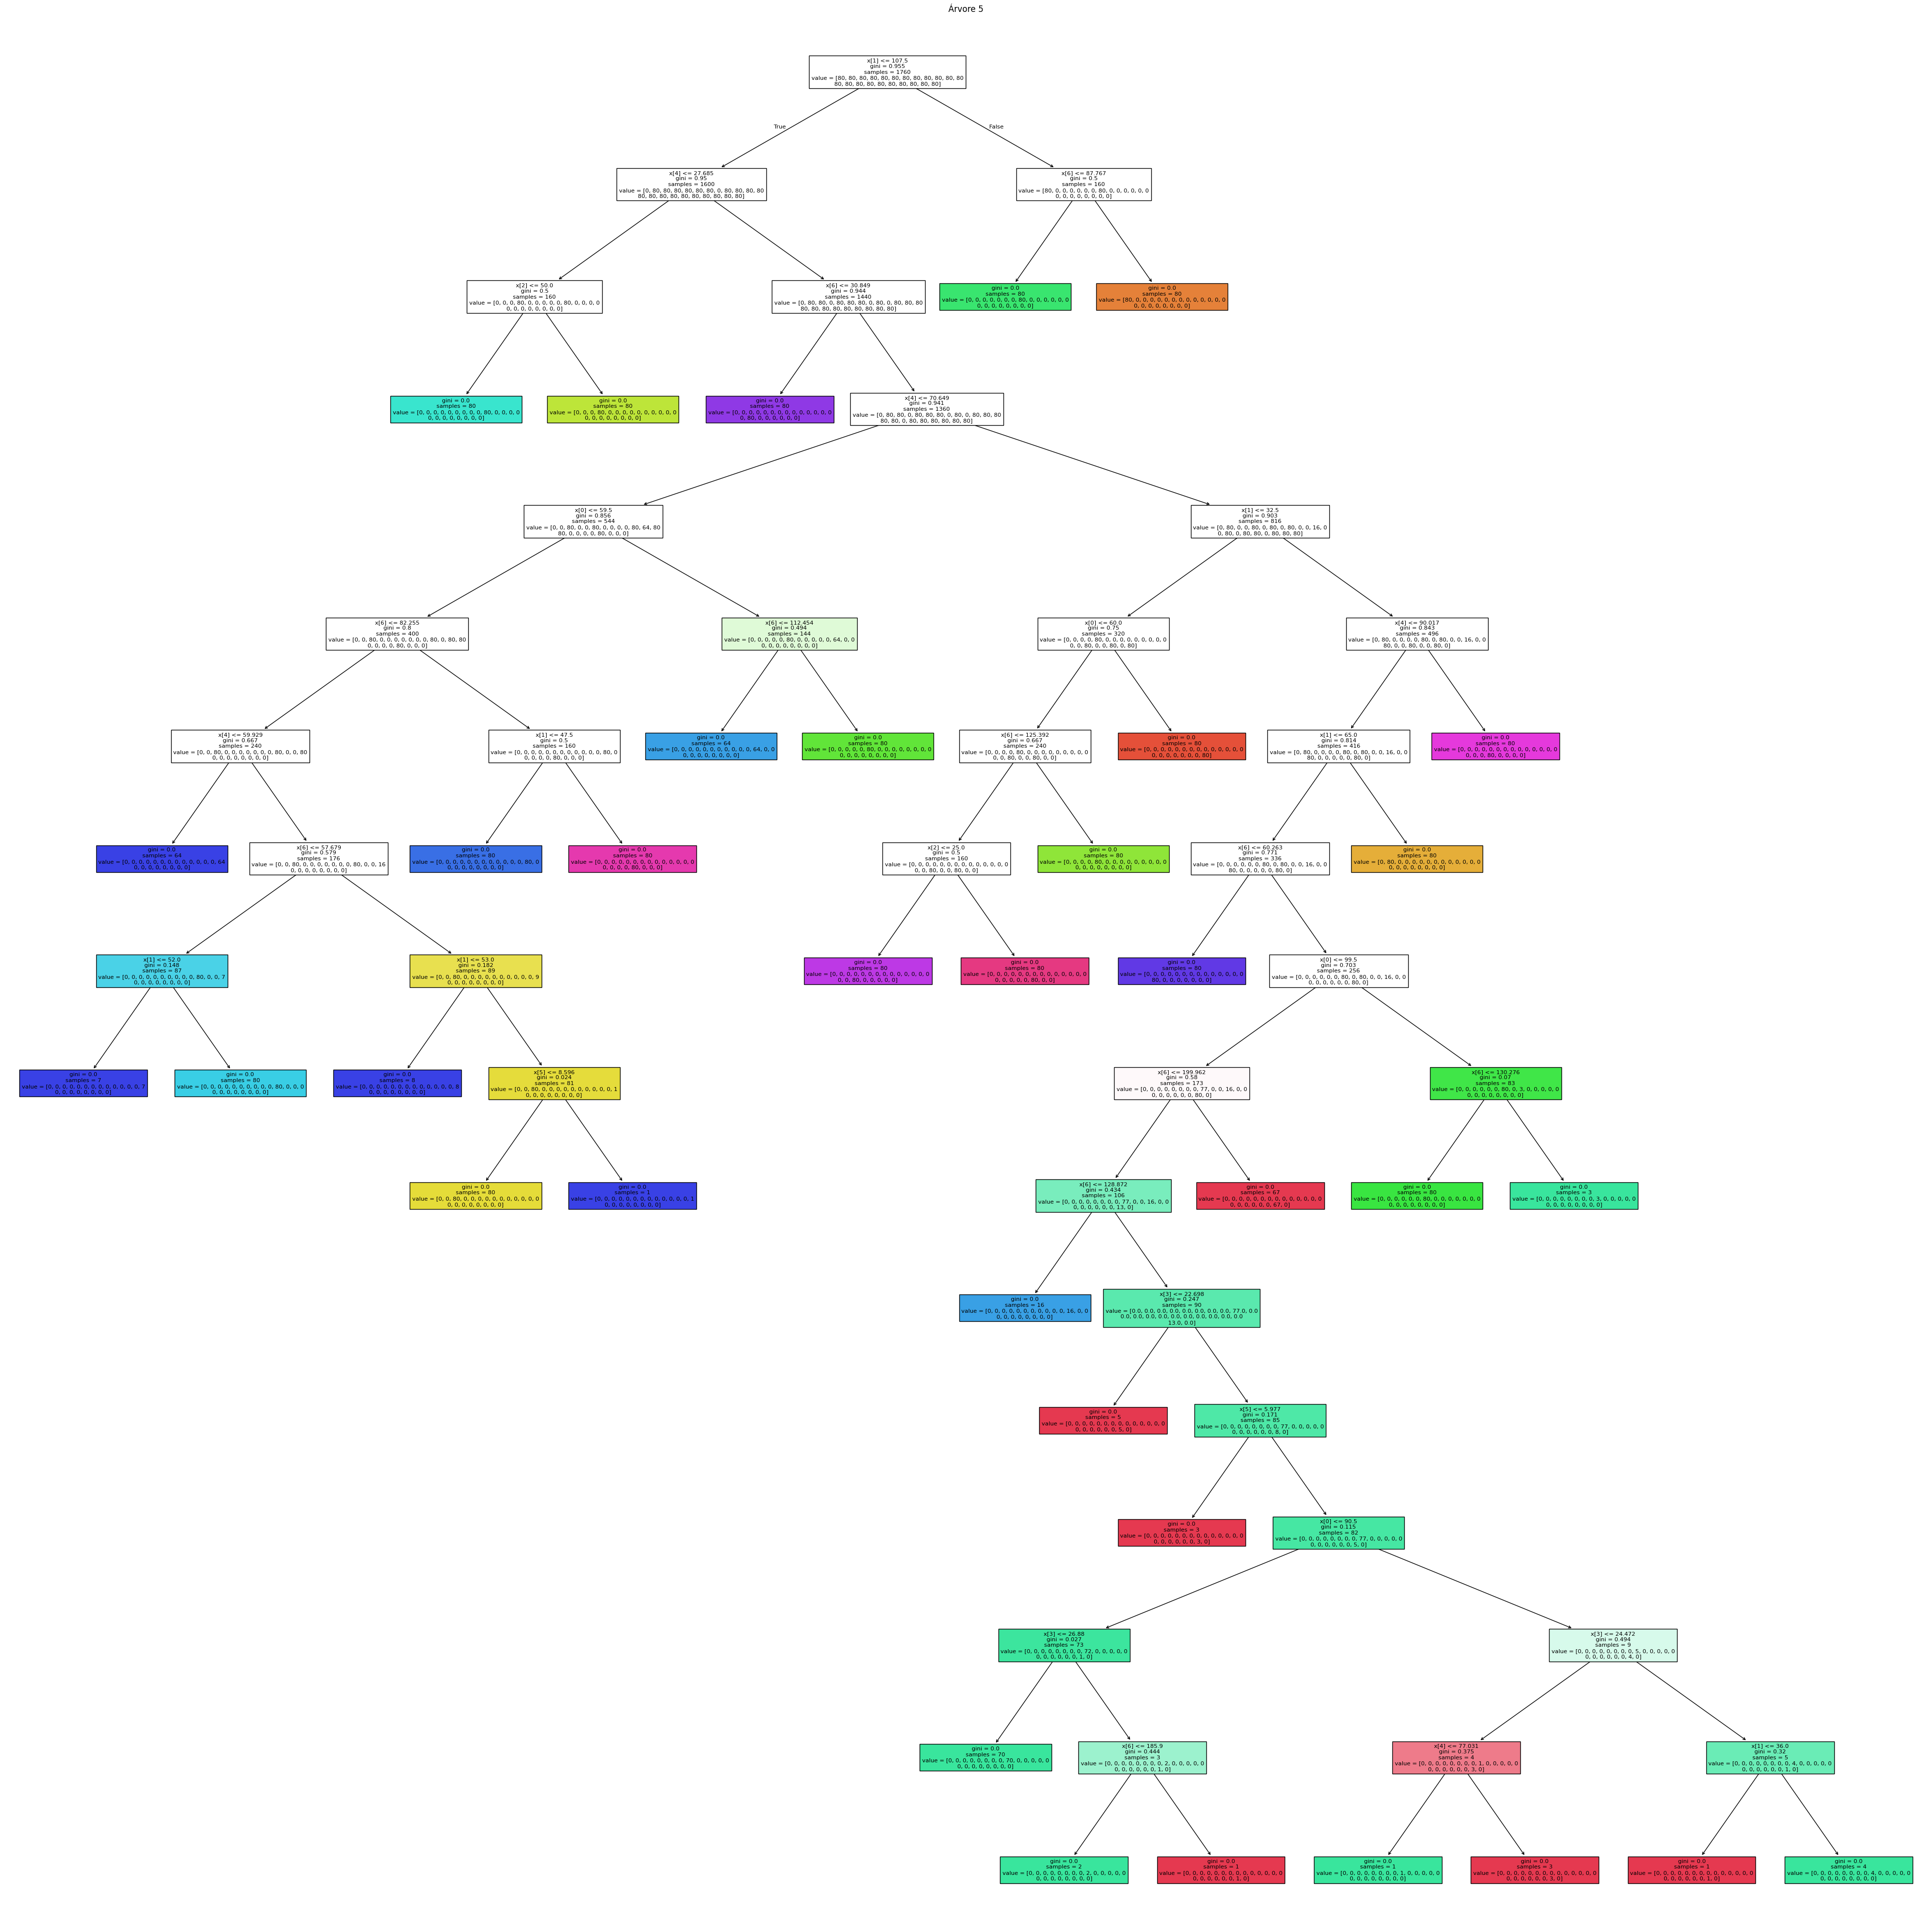

<Figure size 640x480 with 0 Axes>

In [80]:
from sklearn.tree import plot_tree

for i, arvore in enumerate(dt_result['estimator']):
    plt.figure(figsize=(50, 50))
    plot_tree(arvore, filled=True)
     plt.savefig(f"arvore_fold{i+1}.png", dpi=300)
    plt.title(f"Árvore {i+1}")
    plt.show()